<a href="https://colab.research.google.com/github/shahriar00/Face-Mask-Detection/blob/main/Face_Mask_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from zipfile import ZipFile
dataset = '/content/face mask data.zip'

with ZipFile(dataset,'r') as zip:
  zip.extractall()
  print("The Dataset are Extracted")

The Dataset are Extracted


In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
from google.colab.patches import cv2_imshow
from PIL import Image
from sklearn.model_selection import train_test_split

In [ ]:
with_mask_files = os.listdir('/content/data/with_mask')

In [ ]:
without_mask_files = os.listdir('/content/data/without_mask')

In [ ]:
print('Number of with mask images:', len(with_mask_files))
print('Number of without mask images:', len(without_mask_files))

Number of with mask images: 3725
Number of without mask images: 3828


**Label the images**

In [ ]:
with_mask_labels = [1]*3725

In [ ]:
without_mask_labels = [0]*3828

In [ ]:
labels = with_mask_labels + without_mask_labels

In [ ]:
print(labels[0:5])
print(labels[-5:])

[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]


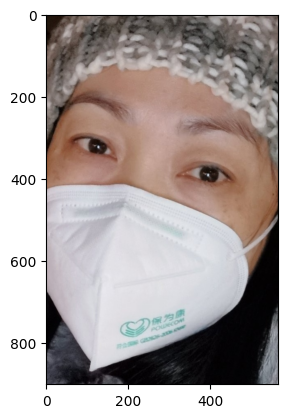

In [ ]:
img = mpimg.imread('/content/data/with_mask/with_mask_101.jpg')
imgplot = plt.imshow(img)
plt.show()

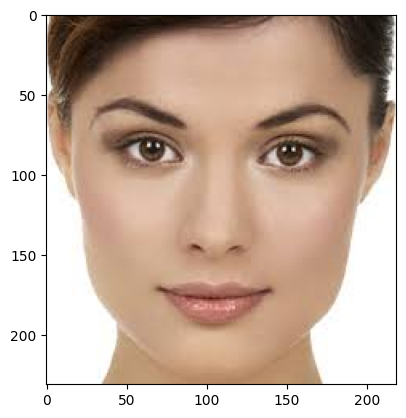

In [ ]:
img = mpimg.imread('/content/data/without_mask/without_mask_1004.jpg')
imgplot = plt.imshow(img)
plt.show()

Image Processing

In [ ]:
with_mask_path = '/content/data/with_mask/'

data = []

for img_file in with_mask_files:

  image = Image.open(with_mask_path + img_file)
  image = image.resize((128,128))
  image = image.convert('RGB')
  image = np.array(image)
  data.append(image)



without_mask_path = '/content/data/without_mask/'


for img_file in without_mask_files:

  image = Image.open(without_mask_path + img_file)
  image = image.resize((128,128))
  image = image.convert('RGB')
  image = np.array(image)
  data.append(image)

/usr/local/lib/python3.10/dist-packages/PIL/Image.py:1054: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


In [ ]:
len(data)

7553

In [ ]:
data[0].shape

(128, 128, 3)

In [ ]:
X = np.array(data)
Y = np.array(labels)

In [ ]:
print(X.shape)
print(Y.shape)

(7553, 128, 128, 3)
(7553,)


In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [ ]:
print(X.shape,X_train.shape,X_test.shape)

(7553, 128, 128, 3) (6042, 128, 128, 3) (1511, 128, 128, 3)


In [ ]:
X_train_Scaled = X_train/255

In [ ]:
X_test_Scaled = X_test/255

Building CNN

In [ ]:
import tensorflow as tf
from tensorflow import keras

In [ ]:
num_of_classes = 2

model = keras.Sequential()

model.add(keras.layers.Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=(128,128,3)))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))


model.add(keras.layers.Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))

model.add(keras.layers.Flatten())

model.add(keras.layers.Dense(128, activation='relu'))
model.add(keras.layers.Dropout(0.5))

model.add(keras.layers.Dense(64, activation='relu'))
model.add(keras.layers.Dropout(0.5))

model.add(keras.layers.Dense(num_of_classes, activation='sigmoid'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
# compile the neural network
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['acc'])

In [ ]:
history = model.fit(X_train_Scaled,Y_train,validation_split = 0.5,epochs=5)

Epoch 1/5
95/95 ━━━━━━━━━━━━━━━━━━━━ 14s 86ms/step - acc: 0.6368 - loss: 0.7977 - val_acc: 0.8921 - val_loss: 0.2637
Epoch 2/5
95/95 ━━━━━━━━━━━━━━━━━━━━ 9s 20ms/step - acc: 0.8703 - loss: 0.3365 - val_acc: 0.8928 - val_loss: 0.2521
Epoch 3/5
95/95 ━━━━━━━━━━━━━━━━━━━━ 3s 21ms/step - acc: 0.8993 - loss: 0.2734 - val_acc: 0.9050 - val_loss: 0.2448
Epoch 4/5
95/95 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - acc: 0.9123 - loss: 0.2076 - val_acc: 0.8911 - val_loss: 0.2669
Epoch 5/5
95/95 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - acc: 0.9295 - loss: 0.1801 - val_acc: 0.9096 - val_loss: 0.2433


Model Evaluation

In [ ]:
loss, accuracy = model.evaluate(X_test_Scaled, Y_test)
print('Test Accuracy =', accuracy)

48/48 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - acc: 0.9031 - loss: 0.2883
Test Accuracy = 0.9159497022628784


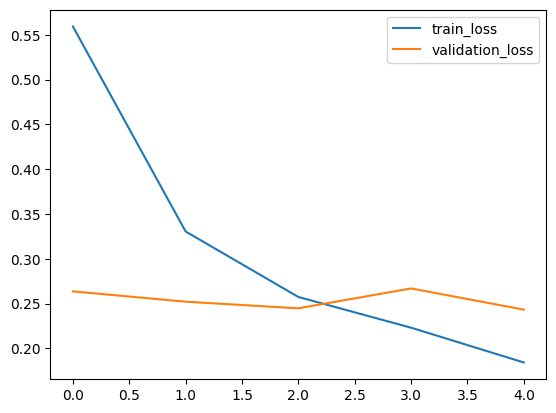

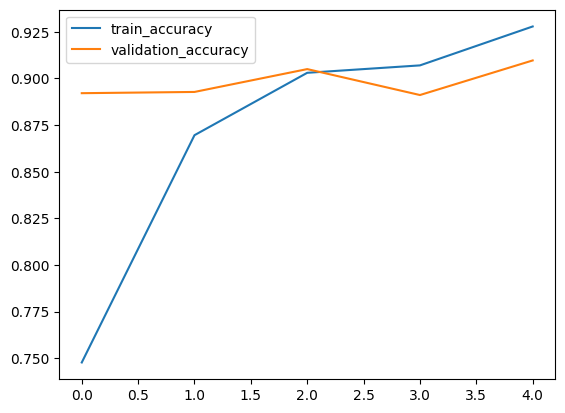

In [ ]:
h = history

plt.plot(h.history['loss'],label = 'train_loss')
plt.plot(h.history['val_loss'],label = 'validation_loss')
plt.legend()
plt.show()


plt.plot(h.history['acc'],label = 'train_accuracy')
plt.plot(h.history['val_acc'],label = 'validation_accuracy')
plt.legend()
plt.show()

In [ ]:
import tensorflow as tf

In [ ]:
# Convert the model to TensorFlow Lite format
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

# Save the .tflite model to a file
with open('face_mask_detection.tflite', 'wb') as f:
    f.write(tflite_model)

print("Model saved as face_mask_detection.tflite")

Saved artifact at '/tmp/tmptgpaqekh'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 128, 128, 3), dtype=tf.float32, name='keras_tensor')
Output Type:
  TensorSpec(shape=(None, 2), dtype=tf.float32, name=None)
Captures:
  132351087682560: TensorSpec(shape=(), dtype=tf.resource, name=None)
  132351087687664: TensorSpec(shape=(), dtype=tf.resource, name=None)
  132351087943296: TensorSpec(shape=(), dtype=tf.resource, name=None)
  132351086303664: TensorSpec(shape=(), dtype=tf.resource, name=None)
  132351086311056: TensorSpec(shape=(), dtype=tf.resource, name=None)
  132351086311760: TensorSpec(shape=(), dtype=tf.resource, name=None)
  132351086121856: TensorSpec(shape=(), dtype=tf.resource, name=None)
  132351086122736: TensorSpec(shape=(), dtype=tf.resource, name=None)
  132351086131360: TensorSpec(shape=(), dtype=tf.resource, name=None)
  132351086132064: TensorSpec(shape=(), dtype=tf.resource, name=None)
Model saved as f